# Visualising Experiment 1 c

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import dirname as dirname
import os
import numpy as np
from scipy import stats
import datetime
from math import sqrt
def sharpe(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)-risk_free
    mu_excess_returns = excess_returns.mean()
    sigma_excess_returns = excess_returns.std()
    if mu_excess_returns < 0:
        return -sqrt(abs(mu_excess_returns)/sigma_excess_returns)
    else:
        return sqrt(mu_excess_returns/sigma_excess_returns)
def cagr(returns):
    return returns.iloc[-1]**(365.25/((returns.index.max()-returns.index.min()).days))-1
def max_drawdown(returns,years=None):
    if years is not None:
        returns = np.array(returns[returns.index>(returns.index.max()-datetime.timedelta(days=365*years))])
    return np.max((1-returns/np.maximum.accumulate(returns))) # end of the period
def calmar(returns):
    return cagr(returns)/max_drawdown(returns)
def ci_mean(x,confidence=0.95):
    x = np.array(x)
    return stats.norm.interval(confidence, loc=x.mean(), scale=x.std()/sqrt(len(x)))
def ci_mean_diff(x,x_base,confidence=0.95):
    diff = np.array(x)-np.array(x_base)
    return ci_mean(diff,confidence=confidence)
def sortino(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)-risk_free
    mu_excess_returns = excess_returns.mean()
    sigma_excess_returns_negative = excess_returns[excess_returns<0].std()
    if mu_excess_returns < 0:
        return -sqrt(abs(mu_excess_returns)/sigma_excess_returns_negative)
    else:
        return sqrt(mu_excess_returns/sigma_excess_returns_negative)
def mean_upside(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)/risk_free-1
    mu_excess_returns = excess_returns.mean()
    return mu_excess_returns
def std_upside(returns,risk_free=None):
    dates = returns.index
    if risk_free is None:
        risk_free = (1.02**((dates.max()-dates.min()).days/365))**(1/len(dates))
        risk_free = np.array([1,]+[risk_free**i for i in range(1,len(dates))])
    excess_returns = np.array(returns)/risk_free-1
    sigma_excess_returns = excess_returns.std()
    return sigma_excess_returns

In [2]:
np.random.seed(1)
all_groups = [['C', 'JPM', 'TCF', 'UMBF'], ['PFE', 'JNJ', 'ABT', 'BMY'], ['INTC', 'XLNX', 'KOPN', 'MXIM'],
			  ['MCD', 'EAT', 'JACK', 'PZZA'], ['LH', 'AMS', 'DGX', 'PMD'], ['COHR', 'PKI', 'BIO', 'WAT'],
			  ['MMM', 'TFX', 'CRY', 'ATRI'], ['TRT', 'IVAC', 'ASYS', 'VECO'], ['GGG', 'FLS', 'ITT', 'IEX'],
			  ['AVX', 'HUBB', 'IIN', 'MRCY'], ['FLEX', 'CTS', 'IEC', 'SANM'], ['HDSN', 'KAMN', 'LAWS', 'WLFC'],
			  ['CIA', 'AAME', 'FFG', 'GL'], ['CIGI', 'FRPH', 'CTO', 'TRC'], ['NBIX', 'BCRX', 'TECH', 'TTNP'],
			  ['SCON', 'MSI', 'BKTI', 'VSAT'], ['LECO', 'CVR', 'SPXC', 'PFIN'], ['STRM', 'EBIX', 'UIS', 'JKHY'],
			  ['UVV', 'STKL', 'ANDE', 'PYX'], ['BZH', 'NVR', 'PHM', 'MTH'], ['MOD', 'DORM', 'STRT', 'SUP'],
			  ['PCAR', 'SPAR', 'F', 'OSK'], ['HLX', 'CLB', 'ENSV', 'RES'], ['BCPC', 'FMC', 'GRA', 'OLN']]
all_sectors = ['National Commercial Banks', 'Pharmaceutical Preparations', 'Semiconductors and Related Devices', 
               'Retail-Eating Places', 'Services-Medical Laboratories', 'Laboratory Analytical Instruments', 
               'Surgical and Medical Instruments and Apparatus', 'Special Industry Machinery, Not Elsewhere Classified', 'Pumps and Pumping Equipment', 
               'Electronic Components And Accessories', 'Printed Circuit Boards', 'Wholesale-Machinery, Equipment and Supplies', 
               'Life Insurance', 'Real estate', 'Biological Products, (No Diagnostic Substances)', 
               'Radio and Television Broadcasting and Communications Equipment', 'Metalworkg Machinery and Equipment', 'Services-Computer Integrated Systems Design', 
               'Wholesale-Farm Product Raw Materials', 'Operative Builders', 'Motor Vehicle Parts and Accessories', 
               'Motor Vehicles and Passenger Car Bodies', 'Oil and Gas Field Services, Not Elsewhere Classified', 'Chemicals and Allied Products']

all_permutations = []
group_count = 3
group_size = len(all_groups[0])

groups = all_groups
while len(all_permutations) < 110:
	gs_i = np.random.choice(range(len(groups)),size=group_count,replace=False)
	gs = [groups[i] for i in gs_i]

	groups = [groups[i] for i in range(len(groups)) if i not in gs_i]
	if groups == []:
		groups = all_groups
	permutation = [np.random.permutation(x).tolist() for x in gs]
	permutation = np.random.permutation(permutation).tolist()
	if permutation not in all_permutations:
		all_permutations.append(permutation)
        
def find_sector(group):
    for i in range(len(all_groups)):
        if group[0] in all_groups[i]:
            break
    return all_sectors[i]

def includes_sector(sectors,run):
    for sector in sectors:
        for group in run:
            if find_sector(group) == sector:
                return True
    return False

## 1) Load Experiment 1 a results

In [3]:
test_name="stacked_env_{}"
group_size = 4
n_logs = 1
log_start_index = 0
n_groups = 100
group_start_index = 0
all_data = []
for j in range(group_start_index,group_start_index+n_groups):
    subset = []
    for i in range(n_logs):
        data = pd.read_csv("{}_log_{}_group_{}.csv".format(test_name,str(i+log_start_index),str(j)),parse_dates=['Date',]).set_index('Date',drop=False)
        subset.append(data)
    all_data.append(subset)
data = all_data[0][0]

## 2) Calculate statistics

In [4]:
d = data.set_index('Date')
base_sharpes = []
base_sortinos = []
base_cagrs = []
base_calmars = []
base_mdds = []
sharpes = []
sortinos = []
relative_sharpes = []
relative_sortinos = []
mean_upsides = []
std_upsides = []
cagrs = []
calmars = []
mdds = []
for ds in all_data:
    for d in ds:
        d = d.set_index('Date')
        sharpes.append(sharpe(d['Profit']))
        sortinos.append(sortino(d['Profit']))
        relative_sharpes.append(sharpe(d['Profit'],d['Base Profit']))
        relative_sortinos.append(sortino(d['Profit'],d['Base Profit']))
        mean_upsides.append(mean_upside(d['Profit'],d['Base Profit']))
        std_upsides.append(std_upside(d['Profit'],d['Base Profit']))
        calmars.append(calmar(d['Profit']))
        cagrs.append(cagr(d['Profit']))
        mdds.append(max_drawdown(d['Profit']))
        base_sharpes.append(sharpe(d['Base Profit']))
        base_sortinos.append(sortino(d['Base Profit']))
        base_calmars.append(calmar(d['Base Profit']))
        base_cagrs.append(cagr(d['Base Profit']))
        base_mdds.append(max_drawdown(d['Base Profit']))

draw_zone_sharpe = 1.0
draw_zone_sortino = 2.0
print("Sharpe win-ratio: {}%".format(round((np.array(relative_sharpes)>=draw_zone_sharpe).sum()/len(relative_sharpes)*100,2)))
print("Sharpe draw-ratio: {}%".format(round(((np.array(relative_sharpes)>0) & (np.array(relative_sharpes)<draw_zone_sharpe)).sum()/len(relative_sharpes)*100,2)))
print("Sharpe loss-ratio: {}%".format(round((np.array(relative_sharpes)<=0).sum()/len(relative_sharpes)*100,2)))
print("Relative Sharpe CI: {}".format(ci_mean(relative_sharpes)))

#print("Sortino win-ratio: {}%".format(round((np.array(relative_sortinos)>=draw_zone_sortino).sum()/len(relative_sortinos)*100,2)))
#print("Sortino draw-ratio: {}%".format(round(((np.array(relative_sortinos)>0) & (np.array(relative_sortinos)<draw_zone_sortino)).sum()/len(relative_sortinos)*100,2)))
#print("Sortino loss-ratio: {}%".format(round((np.array(relative_sortinos)<=0).sum()/len(relative_sortinos)*100,2)))
#print("Relative Sortino CI: {}".format(ci_mean(relative_sortinos)))
print("Sharpe CI: {}".format(ci_mean(sharpes)))
#print("Sortino CI: {}".format(ci_mean(sortinos)))
print("Calmar CI: {}".format(ci_mean(calmars)))
print("CAGR CI: {}".format(ci_mean(cagrs)))
print("MDD CI: {}".format(ci_mean(mdds)))
print("Sharpe difference CI: {}".format(ci_mean_diff(sharpes,base_sharpes)))
print("Calmar difference CI: {}".format(ci_mean_diff(calmars,base_calmars)))
print("CAGR difference CI: {}".format(ci_mean_diff(cagrs,base_cagrs)))
print("MDD difference CI: {}".format(ci_mean_diff(mdds,base_mdds)))
print("Mean upside CI: {}".format(ci_mean(mean_upsides)))
print("Standard deviation upside CI: {}".format(ci_mean(std_upsides)))


c:\python35\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


Sharpe win-ratio: 39.0%
Sharpe draw-ratio: 31.0%
Sharpe loss-ratio: 30.0%
Relative Sharpe CI: (0.30053550508138, 0.621472125491179)
Sharpe CI: (0.8547504111756757, 1.0299091883634612)
Calmar CI: (0.29642742669206584, 0.38793501539908587)
CAGR CI: (0.07737524364198389, 0.09883314161166748)
MDD CI: (0.28085213271295384, 0.31200085572181413)
Sharpe difference CI: (0.08993873475536655, 0.24157180907880127)
Calmar difference CI: (0.04207591003852902, 0.10807578301741831)
CAGR difference CI: (-0.0004258180361571724, 0.013070807350016894)
MDD difference CI: (-0.04176957018806015, -0.009729804711761728)
Mean upside CI: (0.029561040037702966, 0.060774419905159666)
Standard deviation upside CI: (0.06725377113102898, 0.08112050029802825)


## 3) Plot statistics

### 3.1) Relative Sharpe distribution

#### Plot for all runs

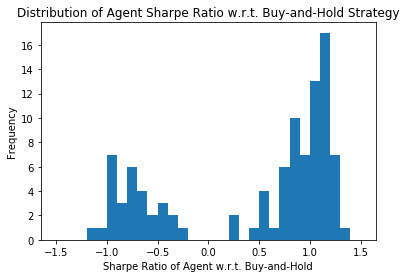

In [5]:
l = relative_sharpes
plt.title("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
plt.hist(l,bins=30,range=(-1.5,1.5))
plt.ylabel("Frequency")
plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
plt.show()

#### Plot per industry

In [6]:
l = relative_sharpes
industries = {k:[] for k in all_sectors}
for i in range(len(all_data)):
    for j in range(group_count):
        industries[find_sector(all_permutations[i][j])].append(l[i])

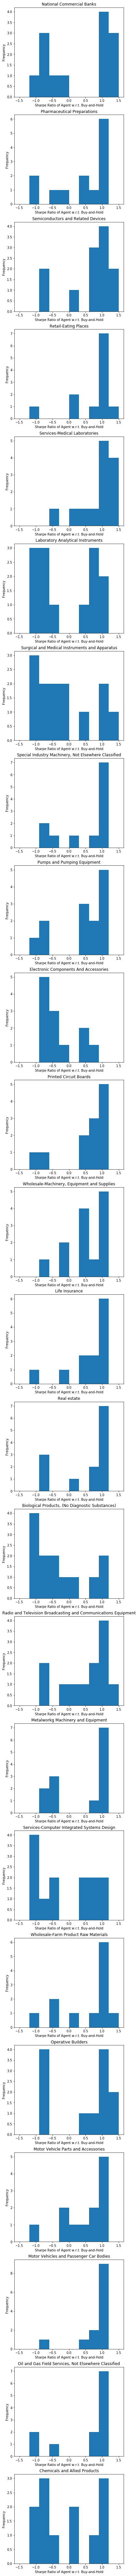

In [104]:
fig, axs = plt.subplots(len(all_sectors),figsize=(6,6*len(all_sectors)))
#fig.suptitle("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
for i in range(len(all_sectors)):
    axs[i].set_title(all_sectors[i])
    axs[i].set_ylabel("Frequency")
    axs[i].set_xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
    axs[i].hist(industries[all_sectors[i]],bins=10,range=(-1.5,1.5))

#### Analyse plots
Suspect industries:
- Semiconductors and Related Devices
- Wholesale-Machinery, Equipment and Supplies
- Biological Products, (No Diagnostic Substances)
- Chemicals and Allied Products

#### Plot for all runs except for those with suspect industries

In [144]:
suspects = ['Semiconductors and Related Devices','Wholesale-Machinery, Equipment and Supplies',
            'Biological Products, (No Diagnostic Substances)','Chemicals and Allied Products']
all_suspects = ['Laboratory Analytical Instruments', 'Surgical and Medical Instruments and Apparatus','Electronic Components And Accessories','Biological Products, (No Diagnostic Substances)','Services-Computer Integrated Systems Design']
suspects = ('Surgical and Medical Instruments and Apparatus', 'Electronic Components And Accessories', 'Biological Products, (No Diagnostic Substances)')
print([all_groups[all_sectors.index(s)] for s in suspects])

[['MMM', 'TFX', 'CRY', 'ATRI'], ['AVX', 'HUBB', 'IIN', 'MRCY'], ['NBIX', 'BCRX', 'TECH', 'TTNP']]


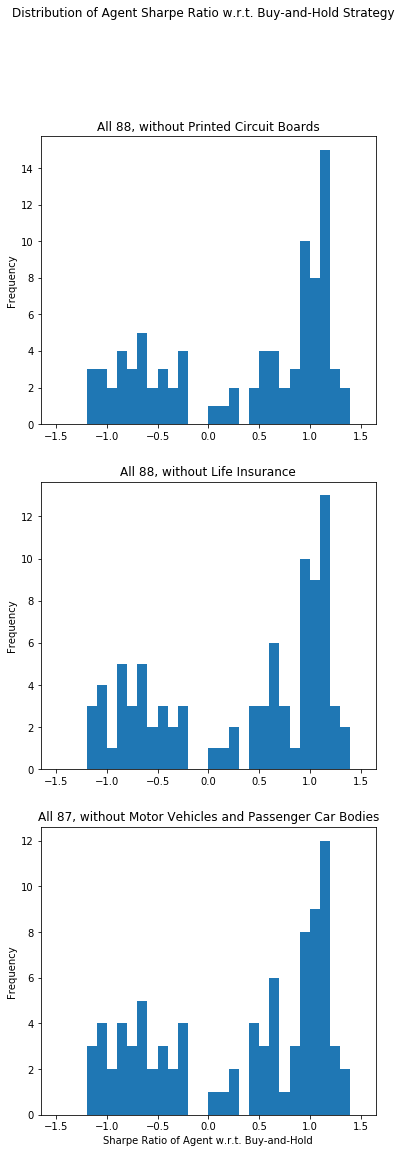

In [136]:
fig, axs = plt.subplots(len(suspects),figsize=(6,6*len(suspects)))
fig.suptitle("Distribution of Agent Sharpe Ratio w.r.t. Buy-and-Hold Strategy")
for i in range(len(suspects)):
    select_runs = [j for j in range(len(all_data)) if not includes_sector([suspects[i],],all_permutations[j])]
    select_l = [l[j] for j in select_runs]
    axs[i].set_title("All {}, without {}".format(len(select_runs),suspects[i]))
    axs[i].set_ylabel("Frequency")
    plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
    axs[i].hist(select_l,bins=30,range=(-1.5,1.5))

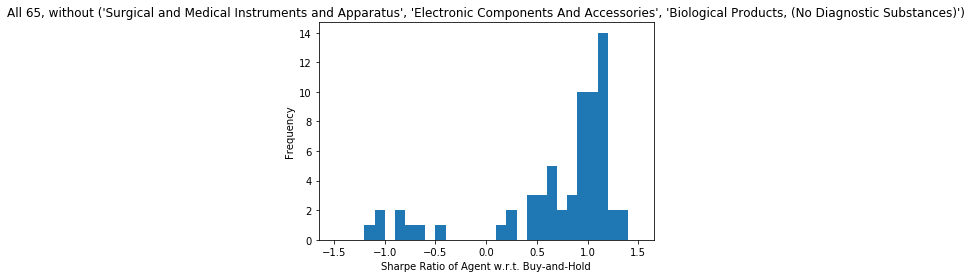

In [145]:
select_runs = [j for j in range(len(all_data)) if not includes_sector(suspects,all_permutations[j])]
select_l = [l[j] for j in select_runs]
plt.title("All {}, without {}".format(len(select_runs),suspects))
plt.hist(select_l,bins=30,range=(-1.5,1.5))
plt.ylabel("Frequency")
plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
plt.show()

In [146]:
print("Win-ratio: {}%".format(round((np.array(select_l)>=draw_zone_sharpe).sum()/len(select_l)*100,2)))
print("Draw-ratio: {}%".format(round(((np.array(select_l)>0) & (np.array(select_l)<draw_zone_sharpe)).sum()/len(select_l)*100,2)))
print("Loss-ratio: {}%".format(round((np.array(select_l)<=0).sum()/len(select_l)*100,2)))


Win-ratio: 43.08%
Draw-ratio: 44.62%
Loss-ratio: 12.31%


In [33]:
# Find worst sectors
import itertools
n_worst = 3
train_test_split = 0.5

relative_sharpes_train = []

for ds in all_data:
    for d in ds:
        d = d.set_index('Date')
        d = d.iloc[:int(d.shape[0]*train_test_split)]
        relative_sharpes_train.append(sharpe(d['Profit'],d['Base Profit']))

best = None
best_score = -1
for n in range(n_worst):
    for suspects in itertools.combinations(all_sectors,n+1):
        select_runs = [j for j in range(len(all_data)) if not includes_sector(suspects,all_permutations[j])]
        select_l = [relative_sharpes_train[j] for j in select_runs]
        wins = (np.array(select_l)>=draw_zone_sharpe).sum()/len(select_l)
        draws = ((np.array(select_l)>0) & (np.array(select_l)<draw_zone_sharpe)).sum()/len(select_l)
        losses = (np.array(select_l)<=0).sum()/len(select_l)
        score = wins*1.5+draws-losses
        score = np.array(select_l).mean()
        if score> best_score:
            best = suspects
            best_score = score
         
relative_sharpes_test = []
sharpes_test = []
sortinos_test = []
relative_sortinos_test = []
mean_upsides_test = []
std_upsides_test = []
calmars_test = []
cagrs_test = []
mdds_test = []
base_sharpes_test = []
base_sortinos_test = []
base_calmars_test = []
base_cagrs_test = []
base_mdds_test = []

for ds in [all_data[j] for j in range(len(all_data)) if not includes_sector(best,all_permutations[j])]:
    for d in ds:
        d = d.set_index('Date')
        #d = d.iloc[int(d.shape[0]*train_test_split):]
        relative_sharpes_test.append(sharpe(d['Profit'],d['Base Profit']))
        
        sharpes_test.append(sharpe(d['Profit']))
        sortinos_test.append(sortino(d['Profit']))
        relative_sortinos_test.append(sortino(d['Profit'],d['Base Profit']))
        mean_upsides_test.append(mean_upside(d['Profit'],d['Base Profit']))
        std_upsides_test.append(std_upside(d['Profit'],d['Base Profit']))
        calmars_test.append(calmar(d['Profit']))
        cagrs_test.append(cagr(d['Profit']))
        mdds_test.append(max_drawdown(d['Profit']))
        base_sharpes_test.append(sharpe(d['Base Profit']))
        base_sortinos_test.append(sortino(d['Base Profit']))
        base_calmars_test.append(calmar(d['Base Profit']))
        base_cagrs_test.append(cagr(d['Base Profit']))
        base_mdds_test.append(max_drawdown(d['Base Profit']))
print(best)

c:\python35\lib\site-packages\ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in double_scalars


('Biological Products, (No Diagnostic Substances)', 'Services-Computer Integrated Systems Design', 'Operative Builders')


In [34]:
# Evaluate worst sectors
print("Number of runs: {}".format(len(relative_sharpes_test)))
print("Win-ratio: {}%".format(round((np.array(relative_sharpes_test)>=draw_zone_sharpe).sum()/len(relative_sharpes_test)*100,2)))
print("Draw-ratio: {}%".format(round(((np.array(relative_sharpes_test)>0) & (np.array(relative_sharpes_test)<draw_zone_sharpe)).sum()/len(relative_sharpes_test)*100,2)))
print("Loss-ratio: {}%".format(round((np.array(relative_sharpes_test)<=0).sum()/len(relative_sharpes_test)*100,2)))
print("Relative Sharpe CI: {}".format(ci_mean(relative_sharpes_test)))
print("Sharpe CI: {}".format(ci_mean(sharpes_test)))
print("Calmar CI: {}".format(ci_mean(calmars_test)))
print("CAGR CI: {}".format(ci_mean(cagrs_test)))
print("MDD CI: {}".format(ci_mean(mdds_test)))
print("Sharpe difference CI: {}".format(ci_mean_diff(sharpes_test,base_sharpes_test)))
print("Calmar difference CI: {}".format(ci_mean_diff(calmars_test,base_calmars_test)))
print("CAGR difference CI: {}".format(ci_mean_diff(cagrs_test,base_cagrs_test)))
print("MDD difference CI: {}".format(ci_mean_diff(mdds_test,base_mdds_test)))
print("Mean upside CI: {}".format(ci_mean(mean_upsides_test)))
print("Standard deviation upside CI: {}".format(ci_mean(std_upsides_test)))

Number of runs: 65
Win-ratio: 46.15%
Draw-ratio: 36.92%
Loss-ratio: 16.92%
Relative Sharpe CI: (0.5578737446902434, 0.8752227934659277)
Sharpe CI: (0.828977102906189, 1.053572109747262)
Calmar CI: (0.29224658171564266, 0.41376519697395486)
CAGR CI: (0.07164861918355363, 0.09963310390958084)
MDD CI: (0.26597677289547617, 0.3081752279104961)
Sharpe difference CI: (0.1585261741261656, 0.36663861379957446)
Calmar difference CI: (0.06569246275806698, 0.1427423881258462)
CAGR difference CI: (0.006688455419087413, 0.019984997536453)
MDD difference CI: (-0.05121893632138831, -0.008578559553396276)
Mean upside CI: (0.050031706118722694, 0.0828755110536847)
Standard deviation upside CI: (0.06566116635077991, 0.08311807071960188)


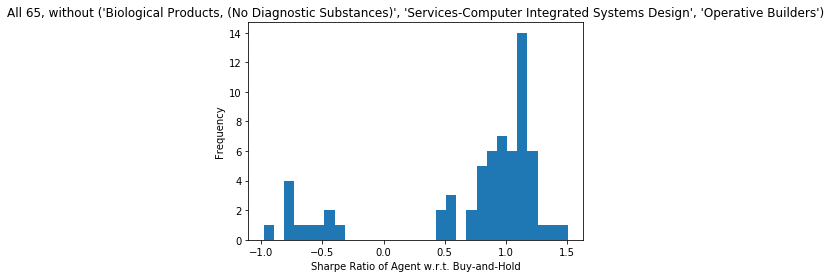

In [28]:
plt.title("All {}, without {}".format(len(relative_sharpes_test),best))
plt.hist(relative_sharpes_test,bins=30)
plt.ylabel("Frequency")
plt.xlabel("Sharpe Ratio of Agent w.r.t. Buy-and-Hold")
plt.show()

In [29]:
!!!!! TODO: een methode vinden voor het selecteren van industriën (bvb. we nemen de industrieën die het best hebben geperformd
                                                            in de train set)

IndentationError: unexpected indent (<ipython-input-29-294e4b96747e>, line 2)

### 3.2) Plot Mean Relative Upside distribution and Std Relative Upside distribution

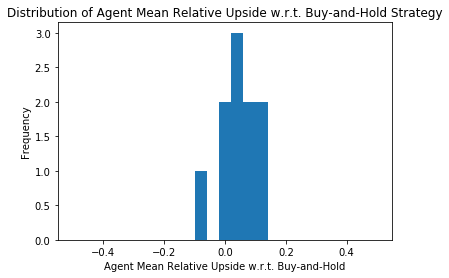

In [11]:
l = mean_upsides
plt.title("Distribution of Agent Mean Relative Upside w.r.t. Buy-and-Hold Strategy")
plt.hist(l,bins=25,range=(-0.5,0.5))
plt.ylabel("Frequency")
plt.xlabel("Agent Mean Relative Upside w.r.t. Buy-and-Hold")
plt.show()

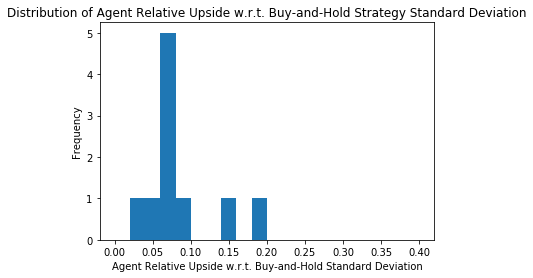

In [13]:
l = std_upsides
plt.title("Distribution of Agent Relative Upside w.r.t. Buy-and-Hold Strategy Standard Deviation")
plt.hist(l,bins=20,range=(0.0,0.4))
plt.ylabel("Frequency")
plt.xlabel("Agent Relative Upside w.r.t. Buy-and-Hold Standard Deviation")
plt.show()

## 4) Analyse portfolios

In [17]:
run_index = 9
data = all_data[run_index][0]
tickers = data.columns[6:]

### 4.1) Calculate average turnover
Baseline to beat: 36.11

Current best: 24.03

In [18]:
def turnover(portfolio):
    return portfolio['Volume'].sum()
volumes = [turnover(d) for run in all_data for d in run]
avg_volume = sum(volumes)/len(volumes)
print("Average turnover: {}".format(round(avg_volume,2)))
print("Transaction costs: {}".format(round(avg_volume*0.0002,4)))

Average turnover: 97.67
Transaction costs: 0.0195


### 4.2) Plot portfolio profit

Text(0, 0.5, 'Profit')

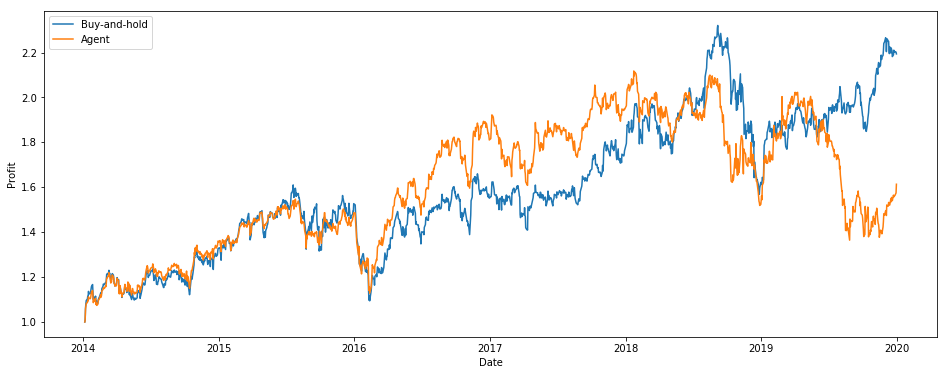

In [19]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=data.Date,y=data['Base Profit'])
sns.lineplot(x=data.Date,y=data['Profit'])
plt.legend(['Buy-and-hold',"Agent"])
plt.ylabel("Profit")

### 4.3) Plot portfolio weights

Text(0, 0.5, 'Portfolio weight')

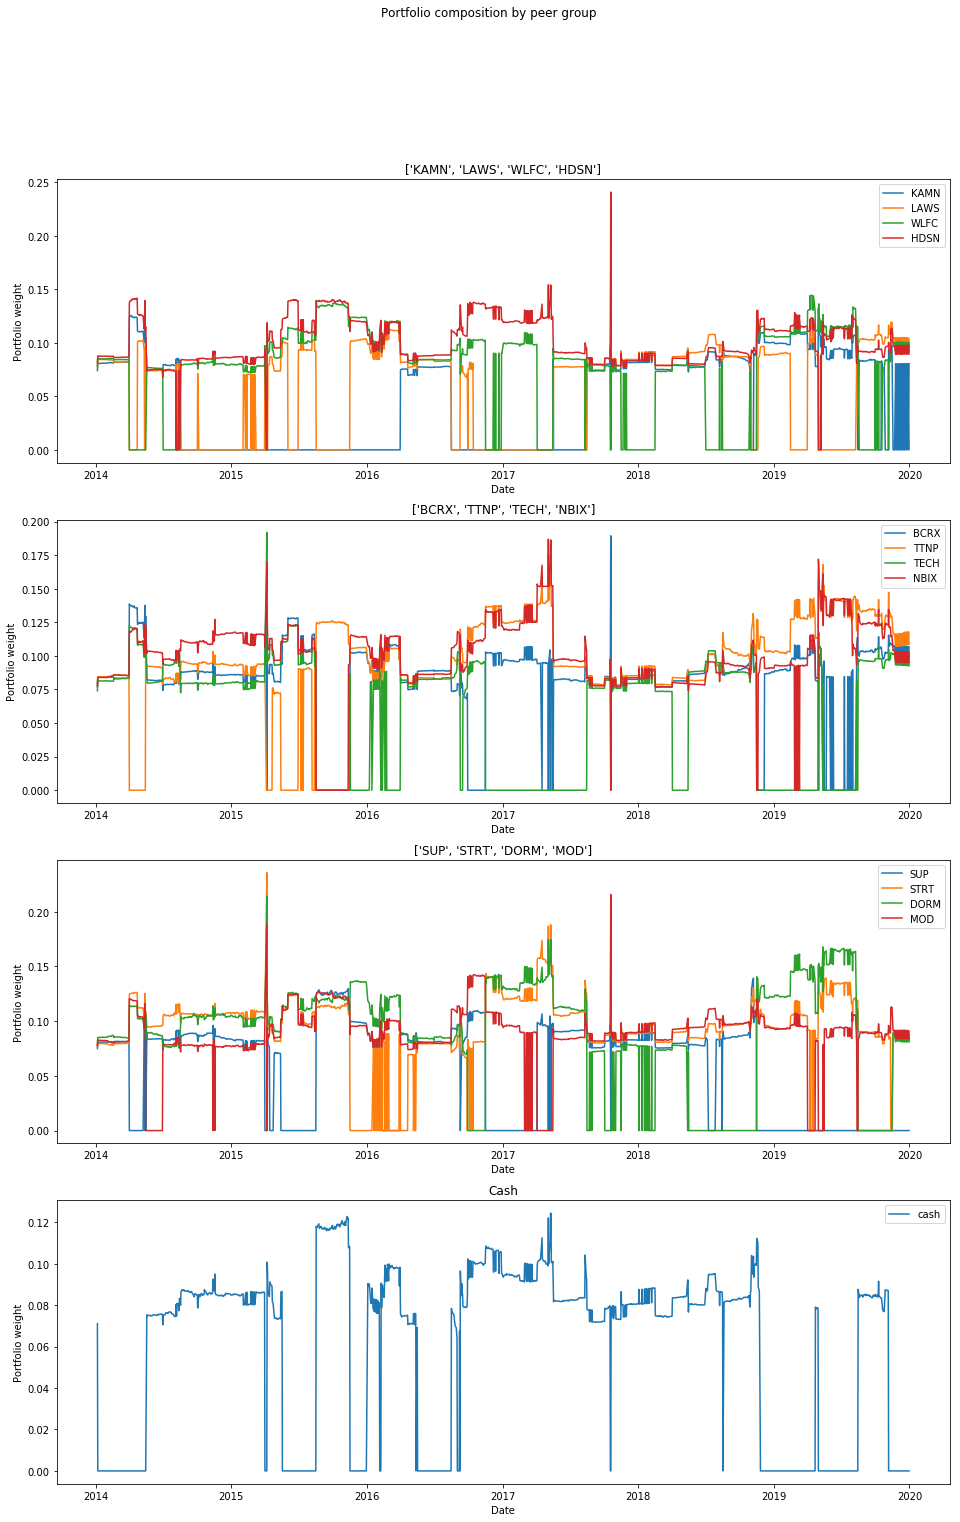

In [49]:
fig, axs = plt.subplots(max(len(tickers)//group_size+1,2),figsize=(16,6*max(len(tickers)//group_size+1,2)))
fig.suptitle("Portfolio composition by peer group")
for i in range(len(tickers)//group_size):
    ts = tickers[i*group_size:(i+1)*group_size]
    for ticker in ts:
        sns.lineplot(x=data.Date,y=data[ticker],ax=axs[i])
        
    axs[i].set_title(str(list(ts)))
    axs[i].legend(ts)
    axs[i].set_ylabel("Portfolio weight")
sns.lineplot(x=data.Date,y=data['cash'],ax=axs[-1])
axs[-1].set_title('Cash')
axs[-1].legend(['cash'])
axs[-1].set_ylabel("Portfolio weight")

### 4.4) Plot aggregated portfolio

Text(0, 0.5, 'Profit')

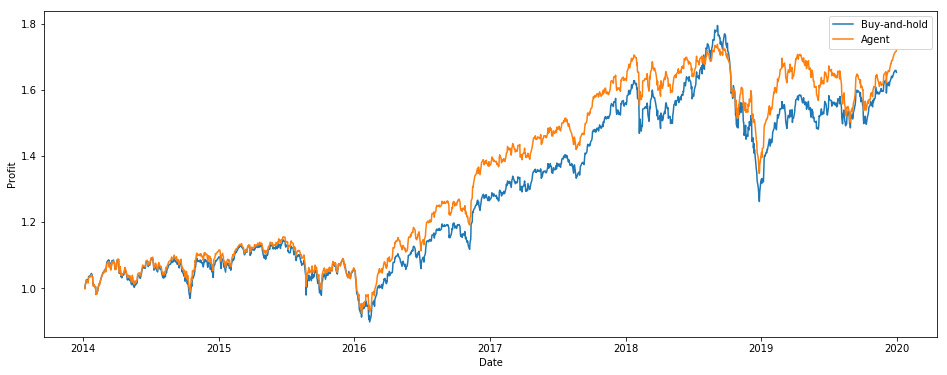

In [20]:
plt.figure(figsize=(16, 6))
base_profit_aggregated = sum([df[0]['Base Profit'] for df in all_data])/len(all_data)
agent_profit_aggregated = sum([df[0]['Profit'] for df in all_data])/len(all_data)
sns.lineplot(x=data.Date,y=base_profit_aggregated)
sns.lineplot(x=data.Date,y=agent_profit_aggregated)
plt.legend(['Buy-and-hold',"Agent"])
plt.ylabel("Profit")

In [78]:
print("Relative Sharpe: {}".format(sharpe(agent_profit_aggregated,base_profit_aggregated)))
print("Sharpe: {} VS {} base".format(sharpe(agent_profit_aggregated),sharpe(base_profit_aggregated)))
print("Calmar: {} VS {} base".format(calmar(agent_profit_aggregated),calmar(base_profit_aggregated)))
print("CAGR: {} VS {} base".format(cagr(agent_profit_aggregated),cagr(base_profit_aggregated)))
print("MDD: {} VS {} base".format(max_drawdown(agent_profit_aggregated),max_drawdown(base_profit_aggregated)))


Relative Sharpe: 0.5798010535033549
Sharpe: 1.193222303034545 VS 1.1446170669119093 base
Calmar: 0.3687517723483561 VS 0.30754332645265603 base
CAGR: 0.08422889375554532 VS 0.0888110713257193 base
MDD: 0.2284162411454802 VS 0.2887758038846312 base


Text(0, 0.5, 'Profit')

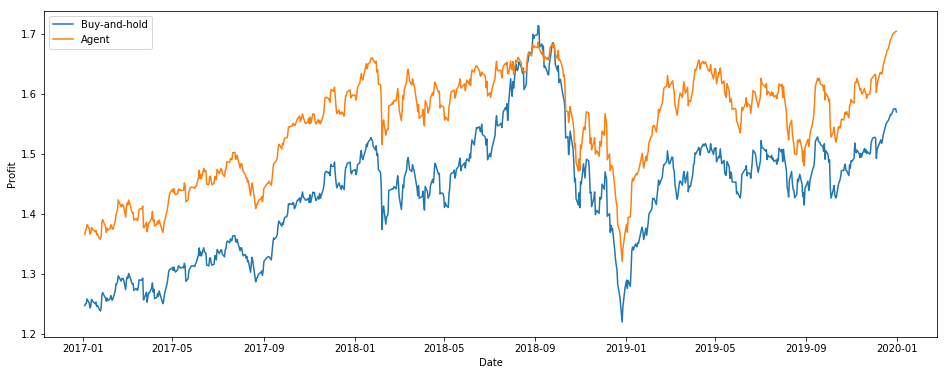

In [25]:
best_data = [all_data[j][0].iloc[int(all_data[j][0].shape[0]*train_test_split):] for j in range(len(all_data)) if not includes_sector(best,all_permutations[j])]
plt.figure(figsize=(16, 6))
base_profit_aggregated = sum([df['Base Profit'] for df in best_data])/len(best_data)
agent_profit_aggregated = sum([df['Profit'] for df in best_data])/len(best_data)
sns.lineplot(x=data.Date,y=base_profit_aggregated)
sns.lineplot(x=data.Date,y=agent_profit_aggregated)
plt.legend(['Buy-and-hold',"Agent"])
plt.ylabel("Profit")

In [22]:
print("Relative Sharpe: {}".format(sharpe(agent_profit_aggregated,base_profit_aggregated)))
print("Sharpe: {} VS {} base".format(sharpe(agent_profit_aggregated),sharpe(base_profit_aggregated)))
print("Calmar: {} VS {} base".format(calmar(agent_profit_aggregated),calmar(base_profit_aggregated)))
print("CAGR: {} VS {} base".format(cagr(agent_profit_aggregated),cagr(base_profit_aggregated)))
print("MDD: {} VS {} base".format(max_drawdown(agent_profit_aggregated),max_drawdown(base_profit_aggregated)))

Relative Sharpe: 1.2481788139136307
Sharpe: 1.1311275078835696 VS 1.0323726255624297 base
Calmar: 0.42940567899100573 VS 0.2712799947411375 base
CAGR: 0.09316696054257623 VS 0.0782429858020317 base
MDD: 0.21696722959392367 VS 0.28842151031701846 base
